In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
train=pd.read_csv("Titanic-Dataset.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


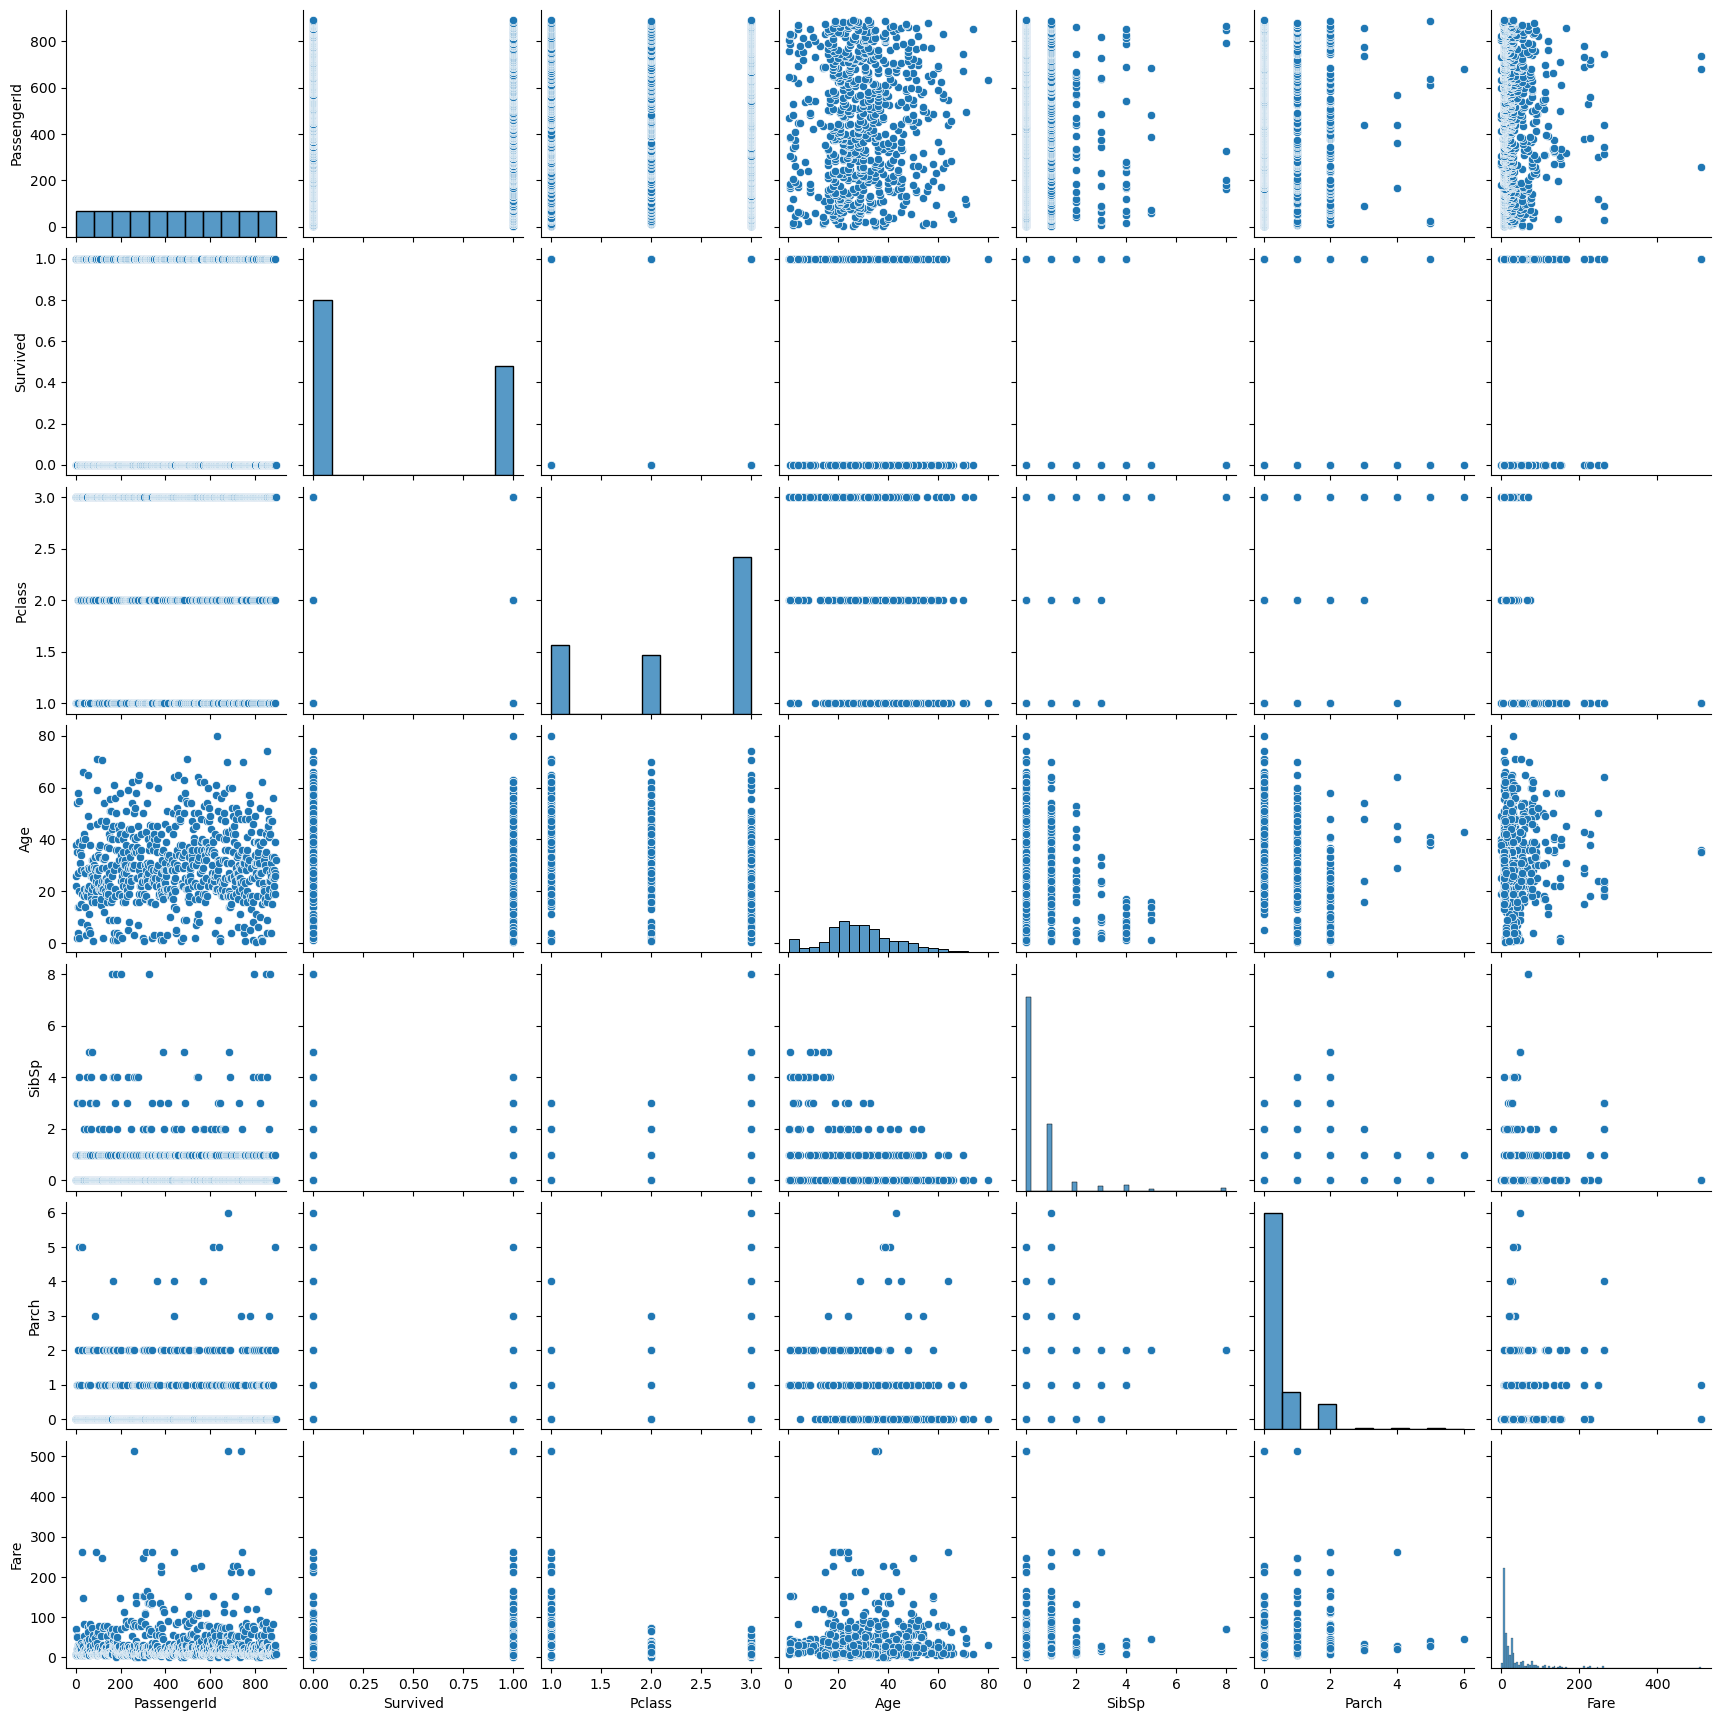

In [5]:
sns.pairplot(train)

<Axes: >

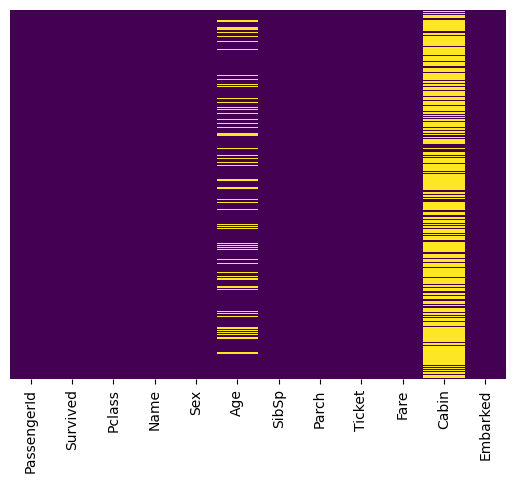

In [6]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap="viridis")

<Axes: >

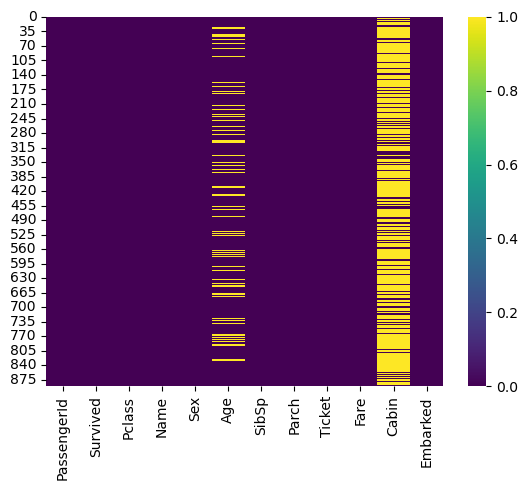

In [7]:
sns.heatmap(train.isnull(),cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

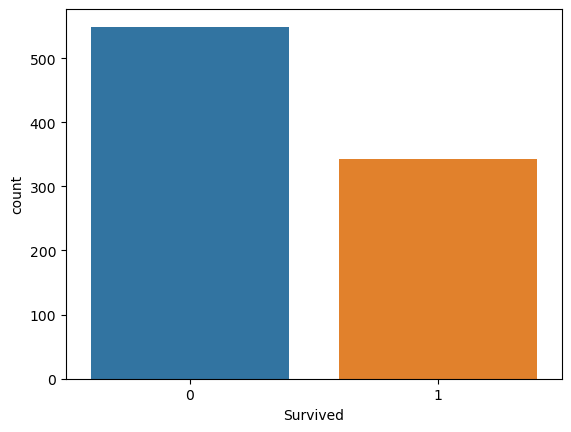

In [8]:
sns.countplot(x="Survived",data=train)

<Axes: xlabel='Survived', ylabel='count'>

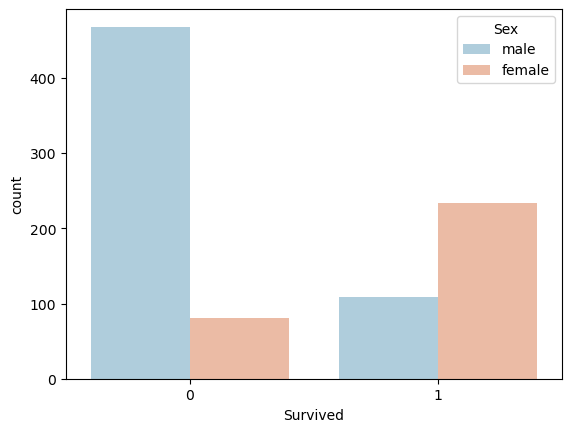

In [10]:
sns.countplot(x="Survived",data=train,hue="Sex",palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

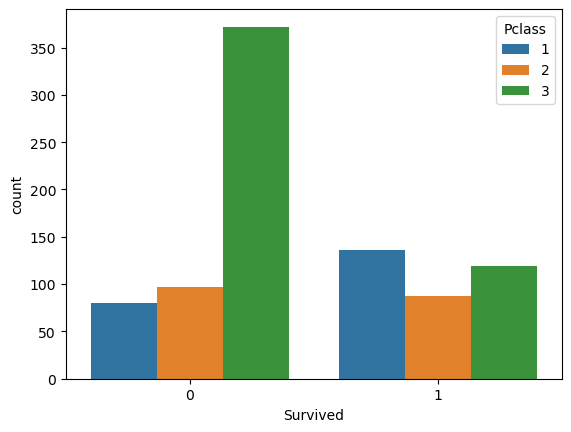

In [11]:
sns.countplot(data=train,x="Survived",hue="Pclass")

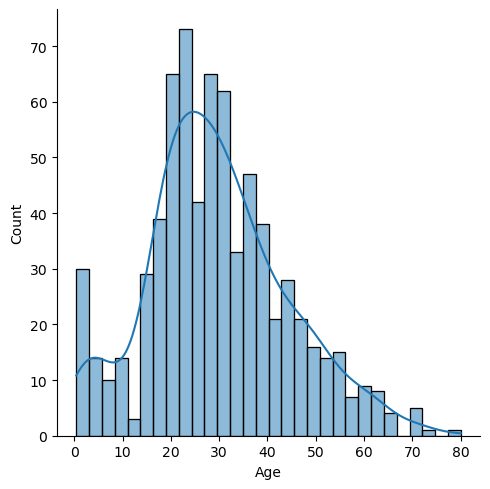

In [12]:

sns.displot(train["Age"].dropna(),bins=30,kde=True)

<Axes: xlabel='SibSp', ylabel='count'>

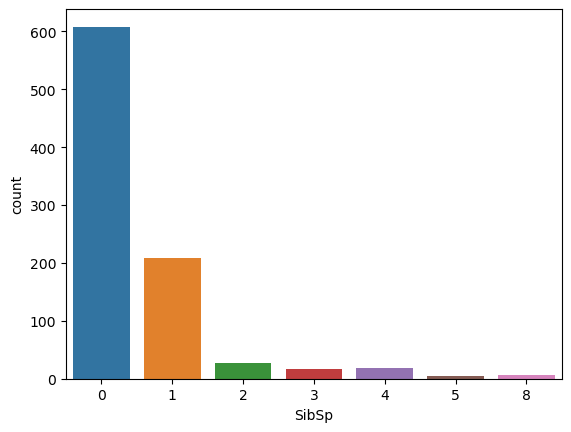

In [13]:
sns.countplot(data=train,x="SibSp")

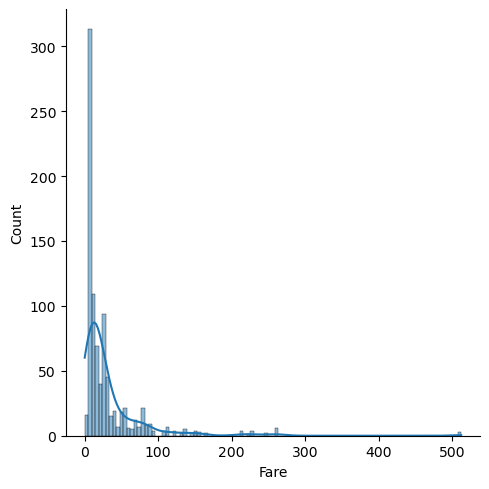

In [14]:
sns.displot(train["Fare"], kde=True)

In [15]:
import cufflinks as cf

c:\Users\Aman\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [16]:
cf.go_offline()

In [17]:
train["Fare"].iplot(kind="hist",bins=50)

<Axes: xlabel='Pclass', ylabel='Age'>

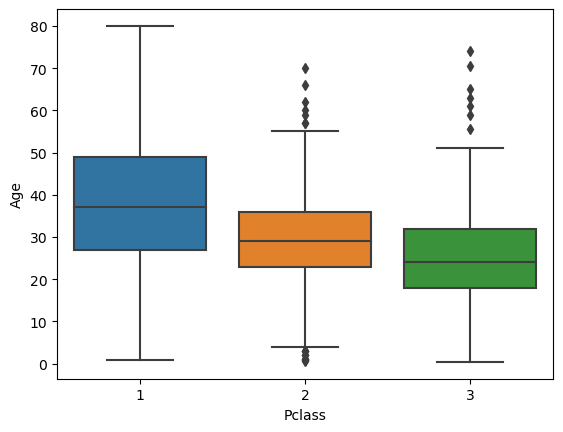

In [18]:
sns.boxplot(x="Pclass",y="Age",data=train)

In [19]:
train.pivot(columns="Pclass",values="Age").iplot(kind="box")


In [20]:
# filling values

In [21]:
def fill(x):
    Age=x[0]
    Pclass=x[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else:
        return Age
        

In [22]:
train["Age"]=train[["Age", "Pclass"]].apply(fill,axis=1)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

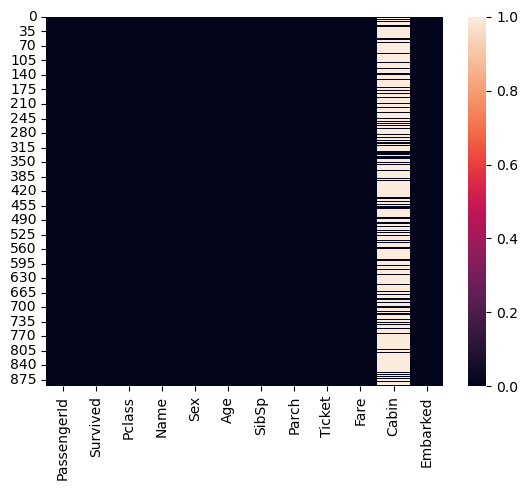

In [24]:
sns.heatmap(train.isnull())

In [25]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

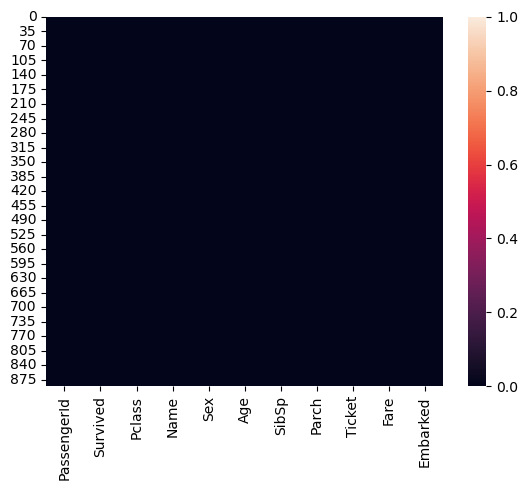

In [26]:
sns.heatmap(train.isnull())

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
pd.get_dummies(train["Sex"])


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [29]:
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [30]:
embark=pd.get_dummies(train["Embarked"], drop_first=True)

In [31]:
pd.concat([train,sex,embark],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [32]:
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [34]:
x= train.drop("Survived", axis=1)
y= train["Survived"]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_test, x_train, y_test, y_train= train_test_split(x,y,test_size=0.3,random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel= LogisticRegression()

In [39]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [40]:
predictions= logmodel.predict(x_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       395
           1       0.60      0.49      0.54       228

    accuracy                           0.70       623
   macro avg       0.67      0.65      0.66       623
weighted avg       0.69      0.70      0.69       623



In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, predictions)

array([[321,  74],
       [116, 112]], dtype=int64)